<a href="https://colab.research.google.com/github/VishalKulkarni-Dev/Groceries-Dataset/blob/main/Case%20Study%20On%20Data%20Mining%20Using%20Association%20Rule%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
#Let's load the dataset
grocery = pd.read_csv('/content/GroceryStoreDataSet.csv', names = ['Products'], sep = ',')
grocery

,Products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [ ]:
#Finding first 5 and last 5 records
grocery.head(5)

,Products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [ ]:
grocery.tail(5)

,Products
15,"COFFEE,SUGER,CORNFLAKES"
16,"BREAD,SUGER,BOURNVITA"
17,"BREAD,COFFEE,SUGER"
18,"BREAD,COFFEE,SUGER"
19,"TEA,MILK,COFFEE,CORNFLAKES"


In [ ]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  20 non-null     object
dtypes: object(1)
memory usage: 288.0+ bytes


In [ ]:
grocery.shape

(20, 1)

In [ ]:
#Here we come to know that, there are no null records. Total 20 records are present in one single columns.
grocery_df = list(grocery["Products"].apply(lambda x:x.split(",") ))
grocery_df

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [ ]:
#Here, we have split the products and create a list.
#One Hot Encoding

#Using TransactionEncoder, we convert the list to a One-Hot Encoded Boolean list. Products that customers bought or did not buy during shopping will now be represented by values 1 and 0.

In [ ]:
te = TransactionEncoder()
te_data = te.fit(grocery_df).transform(grocery_df)
gdf = pd.DataFrame(te_data, columns = te.columns_)
gdf = gdf.replace(False,0)
gdf

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,0,True,0,0,0,0,0,True,0,0
1,True,0,True,0,0,True,0,0,True,0,0
2,0,True,True,0,0,0,0,0,0,0,True
3,0,0,True,0,0,0,True,True,True,0,0
4,True,0,0,0,0,0,0,True,0,0,True
5,0,True,True,0,0,0,0,0,0,0,True
6,0,0,0,0,0,True,0,True,0,0,True
7,True,0,True,0,0,0,0,True,0,0,True
8,0,0,True,0,0,0,True,True,0,0,True
9,0,0,True,0,0,0,0,0,True,0,0


In [ ]:
gdf = gdf.replace(True,1)
gdf

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


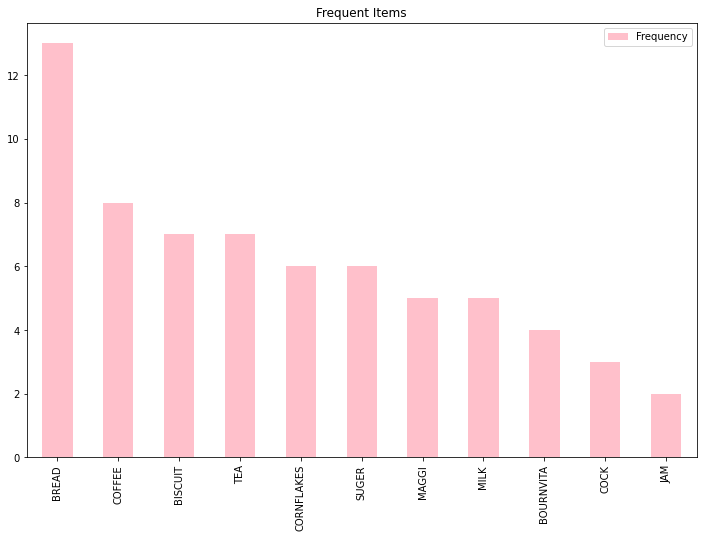

In [ ]:
gdf.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',color='pink',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

In [ ]:
#Applying Apriori Algorithm
#In the next step, we are applying Apriori algrithm. For this data set, we'll set a min_support value with a threshold value of 20% and printed them on the screen as well.


In [ ]:
gdf1 = apriori(gdf, min_support = 0.1, use_colnames = True,)
gdf1


,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
5,0.30,(CORNFLAKES)
6,0.10,(JAM)
7,0.25,(MAGGI)
8,0.25,(MILK)
9,0.30,(SUGER)


In [ ]:
gdf1.sort_values(by = "support" , ascending = False)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
9,0.30,(SUGER)
7,0.25,(MAGGI)
8,0.25,(MILK)
30,0.20,"(SUGER, COFFEE)"
34,0.20,"(MAGGI, TEA)"


In [ ]:
#Sorted from highest to lowest WRT Support values
#In the next step, we'll chose the 60% minimum confidence value. In other words, when product A is purchased, product B also got purchased 60% or more time.

gdf_rules = association_rules(gdf1, metric = 'confidence', min_threshold = 0.6)
gdf_rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(COCK),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950
1,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400
2,(JAM),(BREAD),0.10,0.65,0.10,1.000000,1.538462,0.0350,inf
3,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875
4,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750
5,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050
6,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf
7,(COCK),(CORNFLAKES),0.15,0.30,0.10,0.666667,2.222222,0.0550,2.100
8,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800
9,(SUGER),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800


In [ ]:
#From above table:

#The probability of Milk sales is 25%
#Milk and Bread are sold together in 20% of all purchases (support)
#80% of customers who buy Milk will also buy Bread (confidence)
#Sales of Bread increased by 1.23 times in shopping with Milk (lift)
#Milk & Bread correlation with each other is seen as 1.75

In [ ]:
gdf_rules.sort_values(by = "lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
43,"(COCK, CORNFLAKES)","(COFFEE, BISCUIT)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf
41,"(COFFEE, BISCUIT)","(COCK, CORNFLAKES)",0.10,0.10,0.10,1.000000,10.000000,0.0900,inf
45,(COCK),"(COFFEE, BISCUIT, CORNFLAKES)",0.15,0.10,0.10,0.666667,6.666667,0.0850,2.700
31,(JAM),"(BREAD, MAGGI)",0.10,0.15,0.10,1.000000,6.666667,0.0850,inf
16,(COCK),"(COFFEE, BISCUIT)",0.15,0.10,0.10,0.666667,6.666667,0.0850,2.700
38,"(COFFEE, BISCUIT, CORNFLAKES)",(COCK),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf
14,"(COFFEE, BISCUIT)",(COCK),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf
29,"(BREAD, MAGGI)",(JAM),0.15,0.10,0.10,0.666667,6.666667,0.0850,2.700
42,"(COCK, BISCUIT)","(COFFEE, CORNFLAKES)",0.10,0.20,0.10,1.000000,5.000000,0.0800,inf
19,"(BISCUIT, CORNFLAKES)",(COCK),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.550


In [ ]:
#Lift indicates:

#Whether if two type of products can be sold together - lift value higher than 1
#Whether 1 product be substitute of other - lift value lower than 1
#Whether if there is no relation between the type or products - lift value equals to 1